In [1]:
import pandas as pd
import sys
import sklearn
from pytz import timezone
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

In [2]:
data1 = pd.read_csv(r'diabetes_data_upload.csv', header = None)
data1.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
2,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
3,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
4,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive


In [3]:
data = data1
type(data)

pandas.core.frame.DataFrame

In [4]:
# arrange the data to int
data = data.replace('No', 0)
data = data.replace('Yes', 1)
data = data.replace('Male', 0)
data = data.replace('Female', 1)
data = data.replace('Positive', 1)
data = data.replace('Negative', 0)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
4,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1


In [5]:
count =0
for i in data.columns: #rename the columns names
    data = data.rename(columns={count:data.loc[0][i]})
    count = count + 1
data = data.drop([0]) # delete row 0
data = data.astype('int64') #change data type from 'object' to 'int64'
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
4,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
5,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
data.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

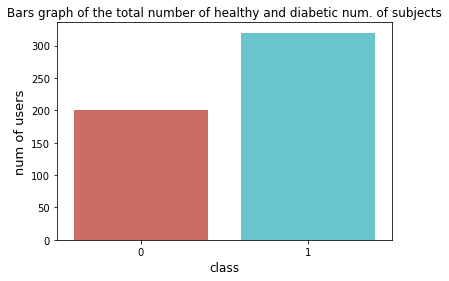

total number of healthy subjects :  200
total number of diabetic subjects :  320


In [7]:

sns.countplot(x = 'class', data=data, palette='hls')
plt.xlabel('class', fontsize=12); plt.title('Bars graph of the total number of healthy and diabetic num. of subjects')
plt.ylabel('num of users', fontsize=13)
plt.show()
print("total number of healthy subjects : ", len(data[data['class']==0]))
print("total number of diabetic subjects : ", len(data[data['class']==1]))
# total amounts od clicks 

Text(0.5, 1.0, 'Correlation Matrix')

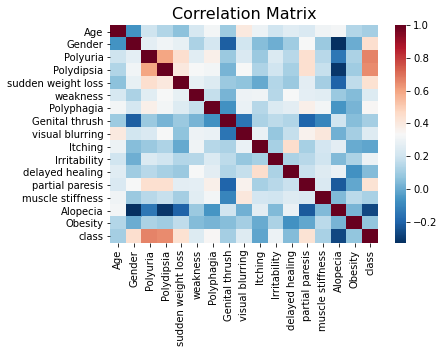

In [8]:
numeric_bank_df = data.select_dtypes(exclude="object")
corr_numeric = numeric_bank_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,) # we see a little bit correlation between screen size and click

In [16]:
# PART 2 - חלוקה לTRAIN וTEST 

train,test= train_test_split(data, test_size=0.2, stratify=None)

print ("number of training samples: ", len(train))
print ("number of test samples: ", len(test))

number of training samples:  416
number of test samples:  104


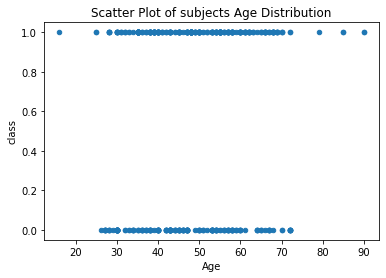

In [10]:
data.plot.scatter(x = "Age", y="class" , title ="Scatter Plot of subjects Age Distribution", )
#plt.title('Scatter Plot of subjects Age Distribution')

Text(0.5, 0.92, '3D Scatter of 3 best features')

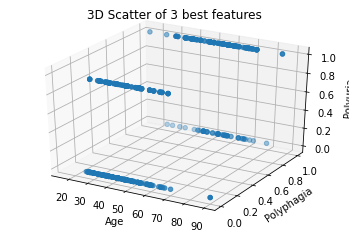

In [11]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Polyphagia'], data['Polyuria'], marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Polyphagia')
ax.set_zlabel('Polyuria')
ax.set_title('3D Scatter of 3 best features')

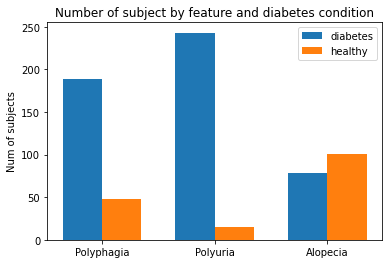

In [12]:
labels = ["Polyphagia", "Polyuria", "Alopecia"]
sick_means =[sum(data["Polyphagia"][data["class"]==1]),sum(data["Polyuria"][data["class"]==1]), sum(data["Alopecia"][data["class"]==1])]
healthy_means =[sum(data["Polyphagia"][data["class"]==0]),sum(data["Polyuria"][data["class"]==0]), sum(data["Alopecia"][data["class"]==0])]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sick_means, width, label='diabetes')
rects2 = ax.bar(x + width/2, healthy_means, width, label='healthy')

ax.set_ylabel('Num of subjects')
ax.set_title('Number of subject by feature and diabetes condition')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [13]:
# preformance evaluation - OVER ALL
train1 = train
test1= test
y = train1['class']
del train1['class']
train1.head()

y1 = test1['class']
del test1['class']
test1.head()



DecsTreeModel_overall = DecisionTreeClassifier(criterion='entropy', max_depth=None)
DecsTreeModel_overall.fit(train1, y)


train_score = DecsTreeModel_overall.score(train1, y)
print ("score on the training data: ", train_score)
print ("\n")

test_score = DecsTreeModel_overall.score(test1, y1)
print ("score on the test data: ", test_score)

score on the training data:  1.0


score on the test data:  1.0


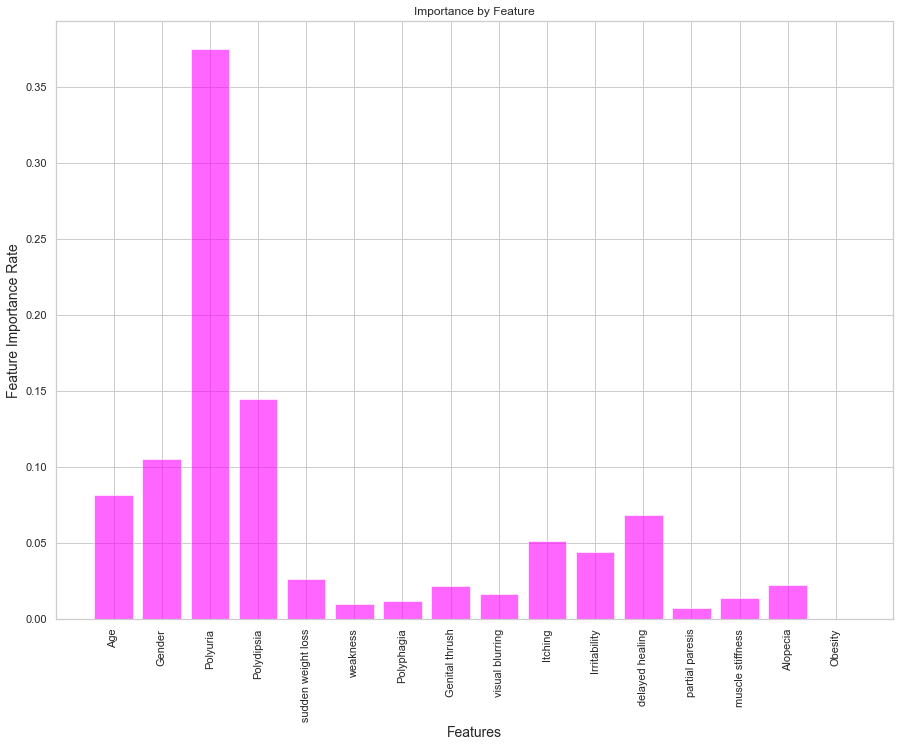

In [14]:
n_features = len(train.columns.values)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), DecsTreeModel_overall.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), train.columns.values, rotation=90, fontsize=11)
plt.xlabel("Features", fontsize=14); plt.title("Importance by Feature")
plt.ylabel("Feature Importance Rate", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')

In [ ]:
"""rn = range(1,len(train)+1)
for train_index, test_index in kf5.split(rn):
    print(train_index, test_index)"""

In [17]:
train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
81,35,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1
517,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
73,65,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
80,43,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
330,56,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0


score on the training data:  1.0
Accuracy for the fold no. 1 on the test set: 0.9523809523809523


score on the training data:  1.0
Accuracy for the fold no. 2 on the test set: 0.9156626506024096


score on the training data:  1.0
Accuracy for the fold no. 3 on the test set: 0.963855421686747


score on the training data:  1.0
Accuracy for the fold no. 4 on the test set: 0.9397590361445783


score on the training data:  1.0
Accuracy for the fold no. 5 on the test set: 0.9759036144578314




Text(0.5, 1.0, 'Validation and Training Score')

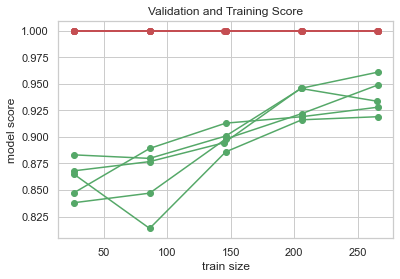

In [18]:
# Part 4 - Decision Tree- cross validation K-fold K=5
# preformance evaluation
from sklearn.model_selection import learning_curve
kf5 = KFold(n_splits=5, shuffle=True)    
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]

    
        DecsTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state =0) #criterion & random_state
        DecsTreeModel.fit(X_train, y_train)


        train_score = DecsTreeModel.score(X_train, y_train)#Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = DecsTreeModel.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
        train_sizes, train_scores, test_scores = learning_curve(DecsTreeModel, X_train, y_train, cv=None)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        #fit_times_mean = np.mean(fit_times, axis=1)
        #fit_times_std = np.std(fit_times, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
        
        

#ax.plot(train_sizes, train_scores_mean, 'o-', color="r")
ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')
#ax.plot(train_sizes, test_scores_mean, 'o-', color="g")


score on the training data:  1.0
Accuracy for the fold no. 1 on the test set: 0.9523809523809523


score on the training data:  1.0
Accuracy for the fold no. 2 on the test set: 0.9156626506024096


score on the training data:  1.0
Accuracy for the fold no. 3 on the test set: 0.9518072289156626


score on the training data:  1.0
Accuracy for the fold no. 4 on the test set: 0.963855421686747


score on the training data:  1.0
Accuracy for the fold no. 5 on the test set: 0.9518072289156626




Text(0.5, 1.0, 'Validation and Training Score')

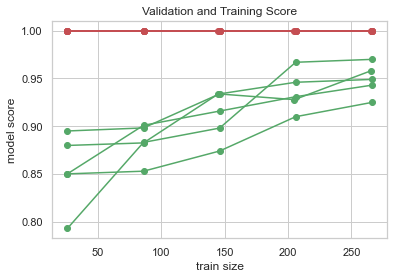

In [19]:
# Part 4 - Decision Tree- cross validation K-fold K=5
# preformance evaluation ////// --------------------without Regularization
kf5 = KFold(n_splits=5, shuffle=True)    
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]

    
        DecsTreeModel = DecisionTreeClassifier(criterion='entropy', splitter = 'random') # No regularization
        DecsTreeModel.fit(X_train, y_train)


        train_score = DecsTreeModel.score(X_train, y_train)#Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = DecsTreeModel.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
        train_sizes, train_scores, test_scores = learning_curve(DecsTreeModel, X_train, y_train, cv=None)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        #fit_times_mean = np.mean(fit_times, axis=1)
        #fit_times_std = np.std(fit_times, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
        
        

#ax.plot(train_sizes, train_scores_mean, 'o-', color="r")
ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')
#ax.plot(train_sizes, test_scores_mean, 'o-', color="g")


In [20]:
# Decision Tree - hyperparameters

hparams = {"max_depth": [3 ,None], "criterion": ["entropy", "gini"], "random_state": [1,0]} # hyperparameters guess
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV( tree, hparams, cv = 5)
tree_cv.fit(train.drop(columns='class'),train["class"] )

print(f'the best hyperparameters are :{tree_cv.best_params_}')
print(f'the best model score is :{tree_cv.best_score_}')



the best hyperparameters are :{'criterion': 'entropy', 'max_depth': None, 'random_state': 0}
the best model score is :0.9446643717728055


score on the training data:  0.9819277108433735
Accuracy for the fold no. 1 on the test set: 0.9404761904761905


score on the training data:  0.984984984984985
Accuracy for the fold no. 2 on the test set: 0.9156626506024096


score on the training data:  0.978978978978979
Accuracy for the fold no. 3 on the test set: 0.9036144578313253


score on the training data:  0.978978978978979
Accuracy for the fold no. 4 on the test set: 0.9036144578313253


score on the training data:  0.987987987987988
Accuracy for the fold no. 5 on the test set: 0.9397590361445783




Text(0.5, 1.0, 'Validation and Training Score')

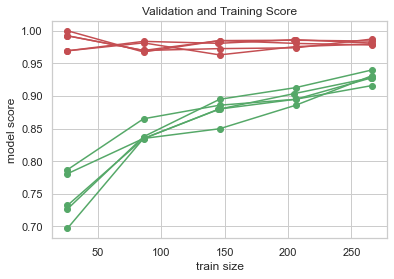

In [32]:
# Part 4 - SVM- cross validation K-fold K=5
# preformance evaluation
kf5 = KFold(n_splits=5, shuffle=True)    
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]
        
        SVModel = SVC(C= 2, kernel='rbf', gamma='auto' )
        SVModel.fit(X_train, y_train)

        train_score = SVModel.score(X_train, y_train) #Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = SVModel.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
        train_sizes, train_scores, test_scores = learning_curve(SVModel, X_train, y_train, cv=5)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
        
        

#ax.plot(train_sizes, train_scores_mean, 'o-', color="r")
ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')
#ax.plot(train_sizes, test_scores_mean, 'o-', color="g")


score on the training data:  0.6204819277108434
Accuracy for the fold no. 1 on the test set: 0.6666666666666666


score on the training data:  0.6306306306306306
Accuracy for the fold no. 2 on the test set: 0.6265060240963856


score on the training data:  0.6396396396396397
Accuracy for the fold no. 3 on the test set: 0.5903614457831325


score on the training data:  0.6396396396396397
Accuracy for the fold no. 4 on the test set: 0.5903614457831325


score on the training data:  0.6186186186186187
Accuracy for the fold no. 5 on the test set: 0.6746987951807228




Text(0.5, 1.0, 'Validation and Training Score')

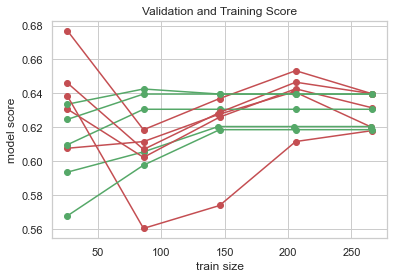

In [22]:
# Part 4 - SVM- cross validation K-fold K=5
# preformance evaluation////// --------------------without Regularization
kf5 = KFold(n_splits=5, shuffle=True)    
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]
        
        SVModel = SVC()
        SVModel.fit(X_train, y_train)

        train_score = SVModel.score(X_train, y_train) #Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = SVModel.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
        train_sizes, train_scores, test_scores = learning_curve(SVModel, X_train, y_train, cv=5)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
        
        

#ax.plot(train_sizes, train_scores_mean, 'o-', color="r")
ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')
#ax.plot(train_sizes, test_scores_mean, 'o-', color="g")

In [23]:
"""plt.plot([1,2,3,4,5], valid_s, label ='valid_score', marker ='*')
plt.plot([1,2,3,4,5], train_s, label ='train_score', marker ='o')
plt.xlabel("fold number")
plt.ylabel("Accuracy Score Rate"); plt.title('Accuracy Score per fold for training and validation sets')"""

'plt.plot([1,2,3,4,5], valid_s, label =\'valid_score\', marker =\'*\')\nplt.plot([1,2,3,4,5], train_s, label =\'train_score\', marker =\'o\')\nplt.xlabel("fold number")\nplt.ylabel("Accuracy Score Rate"); plt.title(\'Accuracy Score per fold for training and validation sets\')'

In [24]:
# SVM - hyperparameters

svmparams = {"kernel": ['linear' ,'ploy', 'rbf'], "C": [0, 0.5, 1, 1.5, 2, 5, 10, 12, 15, 20], "gamma": ["scale","auto",0.01, 0.1,0.2, 0.5]} # hyperparameters guess

SVModel = SVC()
SVModel.fit(train.drop(columns='class'),train["class"] )

grid_search = GridSearchCV( estimator = SVModel, param_grid = svmparams, scoring = 'accuracy', cv= 5, n_jobs = -1)
grid_search = grid_search.fit(train.drop(columns='class'),train["class"])

print(f'the best hyperparameters are :{grid_search.best_params_}')
print(f'the best model score is :{grid_search.best_score_}')

the best hyperparameters are :{'C': 20, 'gamma': 0.2, 'kernel': 'rbf'}
the best model score is :0.9662937464142283


score on the training data:  0.9216867469879518
Accuracy for the fold no. 1 on the test set: 0.9404761904761905




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9309309309309309
Accuracy for the fold no. 2 on the test set: 0.9036144578313253




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.933933933933934
Accuracy for the fold no. 3 on the test set: 0.891566265060241




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9219219219219219
Accuracy for the fold no. 4 on the test set: 0.9397590361445783




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.918918918918919
Accuracy for the fold no. 5 on the test set: 0.9518072289156626




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

Text(0.5, 1.0, 'Validation and Training Score')

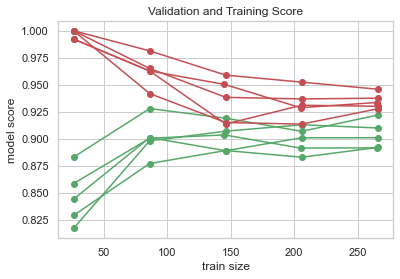

In [25]:
# Logistic Regression

kf5 = KFold(n_splits=5, shuffle=True)    # without a regularization
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]
        
        clf = LogisticRegression(C =10, penalty='l2', tol = 0)
        clf.fit(train.drop(columns='class'),train["class"])

        train_score = clf.score(X_train, y_train) #Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = clf.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
         
        train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
        
ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9337349397590361
Accuracy for the fold no. 1 on the test set: 0.8928571428571429




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9219219219219219
Accuracy for the fold no. 2 on the test set: 0.9397590361445783




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9279279279279279
Accuracy for the fold no. 3 on the test set: 0.9156626506024096




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9279279279279279
Accuracy for the fold no. 4 on the test set: 0.9156626506024096




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

score on the training data:  0.9159159159159159
Accuracy for the fold no. 5 on the test set: 0.963855421686747




D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

Text(0.5, 1.0, 'Validation and Training Score')

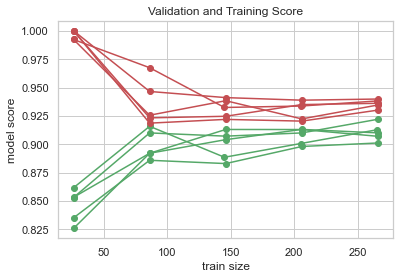

In [26]:
# Logistic Regression

kf5 = KFold(n_splits=5, shuffle=True)    # without a regularization
i = 1
valid_s =[]; train_s=[]
ax = plt.axes()
for train_index, test_index in kf5.split(train):
        y_train = train.iloc[train_index]["class"]
        y_test = train.iloc[test_index]["class"]
        X_train = train.iloc[train_index]
        X_test = train.iloc[test_index]
        del X_train["class"]
        del X_test["class"]
        
        clf = LogisticRegression(C=1, penalty = 'l2',tol =0 )
        clf.fit(train.drop(columns='class'),train["class"])

        train_score = clf.score(X_train, y_train) #Training the model
        print ("score on the training data: ", train_score)
        train_s.append(train_score)
        test_score = clf.score(X_test, y_test)
        valid_s.append(test_score)
        print(f"Accuracy for the fold no. {i} on the test set: {test_score}")
        print ("\n")
        i += 1
        
         
        train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
        

ax.set_xlabel('train size')
ax.set_ylabel('model score')
ax.set_title('Validation and Training Score')


In [27]:
slrparams = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2'], 'tol': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]} # hyperparameters guess





slr = LogisticRegression()
slr.fit(train.drop(columns='class'),train["class"] )

grid_search_lr = GridSearchCV(slr, slrparams, cv= 5)
grid_search_lr.fit(train.drop(columns='class'),train["class"])

print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, i

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, i

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, i

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

{'C': 1.0, 'penalty': 'l2', 'tol': 0.1}
0.9184165232358004


D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
# part 9 - weird results

dt_score = DecsTreeModel.score(test.drop(columns='class'),test["class"] ) 
print("score on the training data: ", dt_score)

svm_score = SVModel.score(test.drop(columns='class'),test["class"] ) 
print("score on the training data: ", svm_score)

clf_score = clf.score(test.drop(columns='class'),test["class"] ) 
print("score on the training data: ", clf_score)

score on the training data:  0.9711538461538461
score on the training data:  0.9519230769230769
score on the training data:  0.9423076923076923


In [34]:
clf


LogisticRegression(C=1, tol=0)

In [35]:
SVModel

SVC(C=2, gamma='auto')

In [36]:
DecsTreeModel

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test["class"], SVModel.predict(test.drop(columns='class')))

array([[43,  3],
       [ 2, 56]], dtype=int64)

In [38]:
# part 10  - ENSEMBLE 

y_dt = DecsTreeModel.predict(test.drop(columns='class')) #'class' label values declorations
y_svm = SVModel.predict(test.drop(columns='class'))
y_clf = clf.predict(test.drop(columns='class'))
y = test['class'].to_numpy() # the "real" label value
new_best_y = []
for i in range(len(y)):
    mean_ans = 0.97*y_dt[i]+ 0.91*(y_svm[i]+y_clf[i]) #compare the relations between the accuracies
    if mean_ans >= 0.5 and y[i]==1: # if the expected value is true positive
        new_best_y.append(1)
    elif mean_ans < 0.5 and y[i]==0: # if the expected value is false negative
        new_best_y.append(0)
    else: #if the expected value is the same as the best model
        new_best_y.append(y[i])


        

In [39]:
com = new_best_y == y #compare between the predicted and the evalueted-models-predicted 

In [42]:
count =0
for i in com:
    if i == False: count=count+1
final_score = (len(y)-count)/len(y)
print(f'the final score is : {final_score}')

com1 = new_best_y == y_dt
com2 = new_best_y == y_svm
com3 = new_best_y == y_clf
print(f'is y_dtree is equal to our new y: {com1.all()}')
print(f'is y_svm is equal to our new y: {com2.all()}')
print(f'is y_clf is equal to our new y: {com3.all()}')

the final score is : 1.0
is y_dtree is equal to our new y: False
is y_svm is equal to our new y: False
is y_clf is equal to our new y: False
